# Linear Regression    
    A linear model makes a prediction by simply computing a weighted sum of the input features, plus a constant called bias term (also called the intercept term)
    Training Model: Setting its parameters so that the model best fits the training set. 

## Linear Regression model prediction
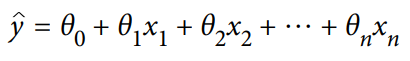
## MSE cost function for a Linear Regression model
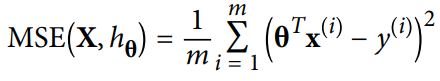
## The Normal Equation
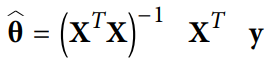
## pseudoinverse
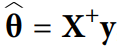
    
    The pseudoinverse itself is computed using a standard matrix factorization technique called SVD - Singular Value Decomposition that can decompose the training set matrix X into the matrix multiplication of three matrices U Σ VT
    
    This approach is more efficient than computing the Normal Equation. The Normal Equation may not work if the matrix if (X.T)@X is not invertible, such as if m < n or if some features are redundant, but the pseudoinverse is always defined.

In [1]:
print('Normal Equation')
import numpy as np

x=5*np.random.randn(100,1)
y=2+8*x + np.random.randn(100,1)
X=np.c_[np.ones((100,1)),x]
theta = np.linalg.inv(X.T @ X) @ X.T @ y
print(theta)

print('sklearn')
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,y)
print('lin_reg.intercept_ = ', lin_reg.intercept_)
print('lin_reg.coef_ = ',lin_reg.coef_)

print('pseudo-inverse')
pseudo_theta = np.linalg.pinv(X) @ y
print(pseudo_theta)

Normal Equation
[[1.80997579]
 [8.02676998]]
sklearn
lin_reg.intercept_ =  [1.80997579]
lin_reg.coef_ =  [[0.         8.02676998]]
pseudo-inverse
[[1.80997579]
 [8.02676998]]


In [2]:
# prediction - y=2+8*x
xtest = np.array([
    [0],
    [2]
])
Xtest = np.c_[np.ones((2,1)),xtest]
print('Xtest =\n',Xtest)

print('Xtest.shape = ',Xtest.shape)
print('theta.shape = ',theta.shape)

ypred = Xtest @ theta
ypred

Xtest =
 [[1. 0.]
 [1. 2.]]
Xtest.shape =  (2, 2)
theta.shape =  (2, 1)


array([[ 1.80997579],
       [17.86351575]])

# Gradient Descent
    The general idea of Gradient Descent is to tweak parameters iteratively in order to minimize a cost function.
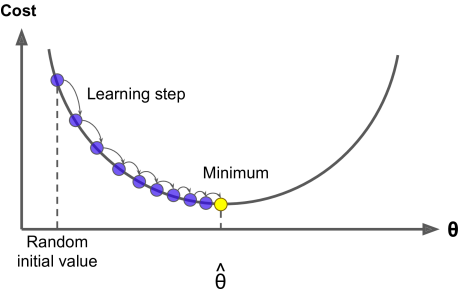
    
    size of the steps - learning rate - hyperparameter
    learning rate is too small - algorithm will have to go through many iterations to converge - will take long time. 
    learning rate is too high - might jump across the valley and end up on the other side - algorithm might diverge
    
## 2 main challenges with Gradient Descent - local minima and plateau   
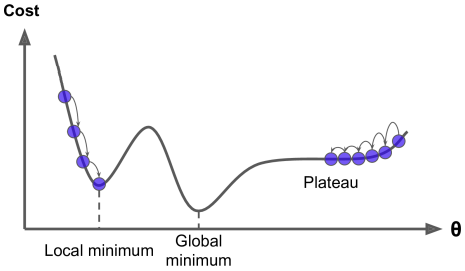

    Fortunately, the MSE cost function for a Linear Regression model is convex function. 
    There are no local minima, just one global minimum.
    The cost function has the shape of a bowl, but it can be an elongated bowl if the features have very different scales. 
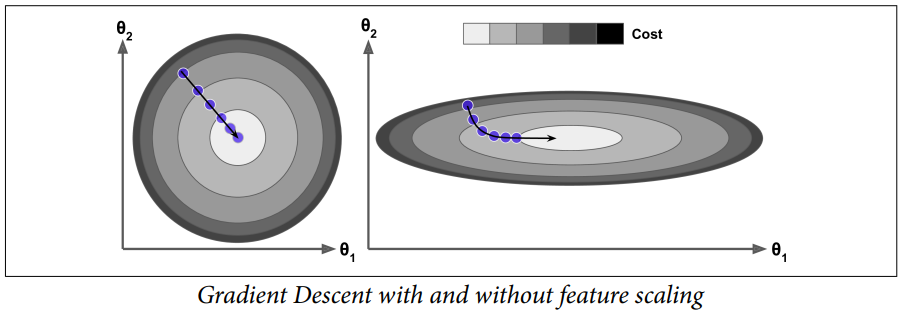

    On the left the Gradient Descent algorithm goes straight toward the minimum, thereby reaching it quickly, whereas on the right it first goes in a direction almost orthogonal to the direction of the global minimum. It will eventually reach to the minimum, but it will take a long time.
    
**Note: When using Gradient Descent, ensure that all features have a similar scale (e.g., using Scikit-Learn’s StandardScaler class), else it will take much longer to converge.**

## Batch Gradient Descent
    To implement Gradient Descent, we need to compute the gradient of the cost function with regards to each model parameter θj. In other words, you need to calculate how much the cost function will change if you change θj just a little bit. It is called a partial derivative. 

### Partial derivatives of the cost function    
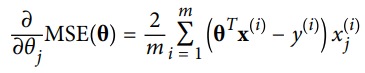
### Gradient vector of the cost function
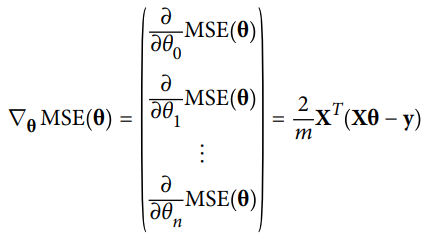

    Notice that this formula involves calculations over the full training set X, at each Gradient Descent step.
    This is why the algorithm is called Batch Gradient Descent: it uses the whole batch of training data at every step.
    As a result it is terribly slow on very large training sets 
    
    However, Gradient Descent scales well with the number of features. 
    Ex: Training a Linear Regression model when there are hundreds of thousands of features is much faster using Gradient Descent than using the Normal Equation or SVD decomposition.

## Gradient Descent step
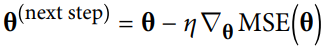

    To find a good learning rate, grid search can be used.
    
**Number of iterations:**

    If it is too low, it will still be far away from the optimal solution when the algorithm stops
    If it is too high, it will waste time while the model parameters do not change anymore. 
    A simple solution is to set a very large number of iterations but to interrupt the algorithm when the gradient vector becomes small. This happens when Gradient Descent has (almost) reached the minimum.

In [3]:
# Batch Gradient Descent Implementation 
import numpy as np

x = 5*np.random.rand(100,1)
y = 2 + 8*x + np.random.rand(100,1) # linear equation with gaussian noise 

X = np.c_[np.ones((100,1)),x] # adding bias 

eta=0.01
n_iteration = 1000
m = X.shape[0]

theta = np.random.randn(2,1)  # only 2 parameters of theta theta0 and theta1 - random initialization 

for i in range(n_iteration):
    grad_vector = (2/m)*X.T@(X@theta - y)
    theta = theta - eta*grad_vector

theta # actual parameter 2,8   

array([[2.60344496],
       [7.9603644 ]])

# Stochastic Gradient Descent
    The main problem with Batch Gradient Descent is the fact that it uses the whole training set to compute the gradients at every step, which makes it very slow when the training set is large. 
    
    At the opposite extreme, Stochastic Gradient Descent just picks a random instance in the training set at every step and computes the gradients based only on that single instance.
    faster - very little data to manipulate at every iteration
    possible to train on huge training sets
    
    Due to its stochastic (i.e., random) nature, algorithm is much less regular than Batch Gradient Descent. 
    Instead of gently decreasing until it reaches the minimum, the cost function will bounce up and down, decreasing only on average. Over time it will end up very close to the minimum, but once it gets there it will continue to bounce around, never settling down. 
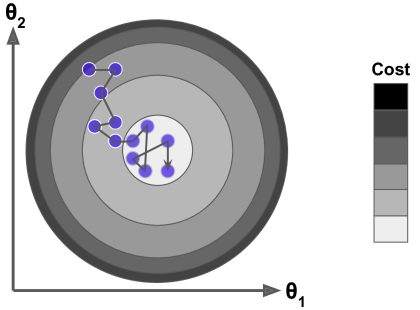   

    When the cost function is very irregular, this can actually help the algorithm jump out of local minima, so Stochastic Gradient Descent has a better chance of finding the global minimum than Batch Gradient Descent does.
    
    One solution to this dilemma (never settling down) is to gradually reduce the learning rate. 
    The steps start out large (which helps make quick progress and escape local minima), then get smaller and smaller, allowing the algorithm to settle at the global minimum.
    
    The function that determines the learning rate at each iteration is called the learning schedule. 

In [4]:
#Stochastic Gradient Descent implementation
import numpy as np

x = 6*np.random.rand(100,1)
y = 3 + 7*x + np.random.rand(100,1) # linear equation with gaussian noise 

X = np.c_[np.ones((100,1)),x] # adding bias 

t0,t1 = 5, 50
epochs = 100
m = X.shape[0]

def learning_schedular(t):
    return t0/(t+t1)

theta = np.random.randn(2,1)  # only 2 parameters of theta theta0 and theta1 - random initialization 

for epoch in range(epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        Xi = X[random_index:random_index+1] # to maintain 2D shape 
        yi = y[random_index:random_index+1]
        
        grad_vector = 2 * Xi.T @ (Xi@theta - yi)
        theta = theta - learning_schedular(epoch*m + i) * grad_vector

theta # actual parameter 3,7

array([[3.57851933],
       [6.98816649]])

**Note:**

    While  using Stochastic Gradient Descent, the training instances must be independent and identically distributed (IID), to ensure that the parameters get pulled towards the global optimum, on average. 
    
    A simple way to ensure this is to shuffle the instances during training (e.g., pick each instance randomly, or shuffle the training set at the beginning of each epoch). 
    
    If you do not do this, for example if the instances are sorted by label, then SGD will start by optimizing for one label, then the next, and so on, and it will not settle close to the global minimum.

In [5]:
import numpy as np
from sklearn.linear_model import SGDRegressor

x = 2*np.random.rand(100,1)
y = 2 + 4*x + np.random.rand(100,1) # linear equation with gaussian noise 

X = np.c_[np.ones((100,1)),x] # adding bias 

sgd_reg = SGDRegressor(max_iter=10000, tol=0.01, penalty=None, eta0=0.1)
sgd_reg.fit(X,y.ravel()) # y expected as 1D array (x,)
sgd_reg.coef_  # expected 2,4

array([1.30969035, 3.88522614])

# Mini-batch Gradient Descent
    At each step, instead of computing gradients based on the full training set (as in Batch GD) or based on just one instance (as in Stochastic GD), Mini-batch GD computes the gradients on small random sets of instances called mini-batches.
    
    As a result, Mini-batch GD will end up walking around a bit closer to the minimum than SGD. But, on the other hand, it may be harder for it to escape from local minima. 

# Polynomial Regression
    When data is actually more complex than a simple straight line, still we can use a linear model to fit nonlinear data. 
    A simple way to do this is to add powers of each feature as new features, then train a linear model on this extended set of features. This technique is called Polynomial Regression.
**Note:**
    
    Scikit-Learn’s PolynomialFeatures class can be used to transform our training data.     
    PolynomialFeatures is capable of finding combinations of features up to the given degree. 
    Ex: features a,b with degree=3 ==> add features of 
$$ a^2, a^3, b^2, b^3, ab, a^2 b, ab^2 $$

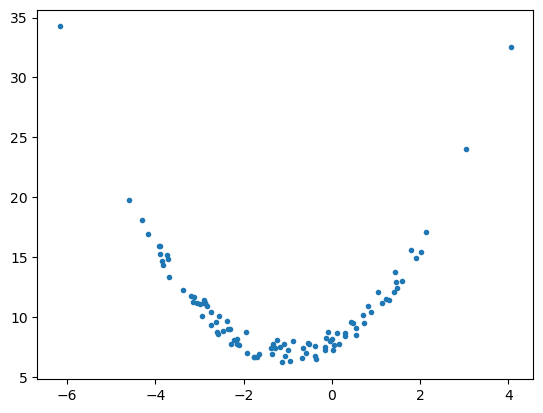

x[0] =  [0.55105661]
x[0] with polynomial features: x_poly[0] =  [0.55105661 0.30366339]


(array([7.89706666]), array([[2.00980308, 1.01174618]]))

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
m = 100
x = 2*np.random.randn(m,1) - 1
y = x**2 + 2*x + 7 + 2*np.random.rand(m,1)

plt.plot(x,y,'.')
plt.show()

poly_features = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly_features.fit_transform(x)   
# after transformation, X_poly will have the original feature of X plus the square of this feature.

print('x[0] = ',x[0])
print('x[0] with polynomial features: x_poly[0] = ', x_poly[0])

#Now LinearRegression model can fit toextended training data
lin_reg = LinearRegression()
lin_reg.fit(x_poly, y)
lin_reg.intercept_, lin_reg.coef_ 

# overfitting - underfitting
**cross-validation**

    If a model performs well on the training data but generalizes poorly on validation set according to the cross-validation metrics, then the model is overfitting. 
    If it performs poorly on both, then it is underfitting. 
**learning curves**
    
    By looking at training and validation curve also underfiting and overfitting can be judged.

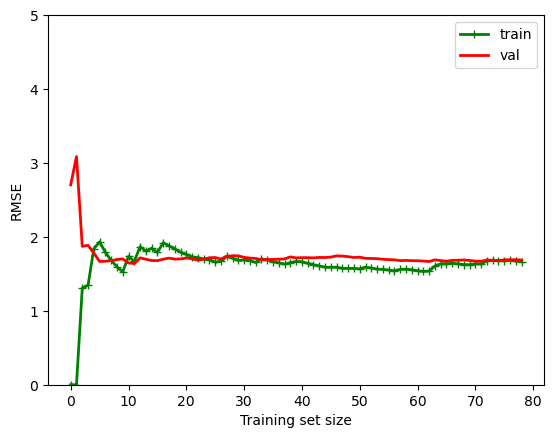

In [7]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

def plot_learning_curves(model, X, y):
    xtrain, xval, ytrain, yval = train_test_split(X,y, test_size=0.2)
    train_errors, val_errors = [], []
    
    for m in range(1,len(xtrain)):
        model.fit(xtrain[:m], ytrain[:m])
        ytrain_pred = model.predict(xtrain[:m])
        yval_pred = model.predict(xval)
        
        train_errors.append(mean_squared_error(ytrain[:m], ytrain_pred))
        val_errors.append(mean_squared_error(yval, yval_pred))
    
    plt.plot(np.sqrt(train_errors), 'g-+', linewidth=2, label='train')
    plt.plot(np.sqrt(val_errors), 'r-', linewidth=2, label='val')
    plt.xlabel('Training set size')
    plt.ylabel('RMSE')
    plt.ylim(0,5)
    plt.legend()
    plt.show()

    
X = 6 * np.random.rand(100, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(100, 1)


lin_model = LinearRegression()
plot_learning_curves(lin_model, X,y)

**training data performance**

    when there are just one or two instances in the training set, the model can fitthem perfectly, which is why the curve starts at zero. But as new instances are added to the training set, it becomes impossible for the model to fit the training data perfectly, both because the data is noisy and because it is not linear at all. So the error on the training data goes up until it reaches a plateau, at which point adding new instances to the training set doesn’t make the average error much better or worse. 

**validation data performance**

    When the model is trained on very few training instances, it is incapable of generalizing properly, which is why the validation error is initially quite big. Then as the model is shown more training examples, it learns and thus the validation error slowly goes down. However, once again a straight line cannot do a good job modeling the data, so the error ends up at a plateau, very close to the other curve.
    
**These learning curves are typical of an underfitting model. Both curves have reached a plateau and they are close and fairly high.**

    If model is underfitting the training data, adding more training examples will not help. We need to use a more complex model or come up with better features.

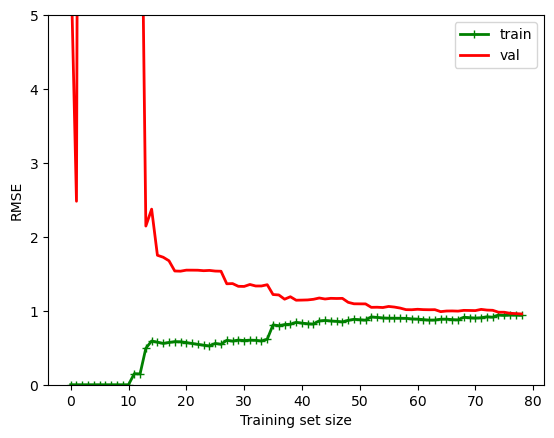

In [8]:
from sklearn.pipeline import Pipeline

poly_reg = Pipeline([
    ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
    ('lin_reg', LinearRegression())
])

plot_learning_curves(poly_reg, X,y)

    The error on the training data is much lower than with the Linear Regression model.
    There is a gap between the curves. This means that the model performs significantly better on the training data than on the validation data, which is the hall mark of an overfitting model. However, if you used a much larger training set, the two curves would continue to get closer.
**Handling of overfitting: Feeding it more training data until the validation error reaches the training error.**    

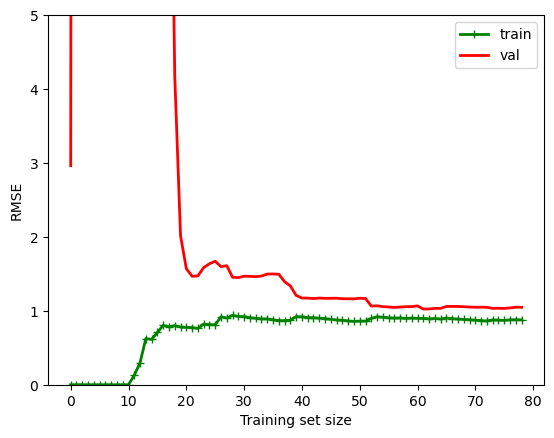

In [9]:
quadratic_reg = Pipeline([
    ('quadratic_features', PolynomialFeatures(degree=2, include_bias=False)),
    ('lin_reg', LinearRegression())
])

plot_learning_curves(poly_reg, X,y)

**best fitting model**

    Fits training data better
    RMSE is low
    Gap between train and val error decreases and try to converge at the end. 

# Bias-Variance Tradeof

$$ generalization~error = Bias + Variance + Irreducible~error$$

**Bias**

    This part of the generalization error is due to wrong assumptions, such as assuming that the data is linear when it is actually quadratic. A high-bias model is most likely to underfit the training data.

**Variance**

    This part is due to the model’s extra sensitivity to small variations in the training data. 
    A model with many degrees of freedom (such as a high-degree polynomial model) is likely to have high variance.
    A high-bias model is most likely to overfit the training data.

**Irreducible error**

    This part is due to the noisiness of the data itself. 
    The only way to reduce this part of the error is to clean up the data (e.g., fix the data sources, such as broken sensors, or detect and remove outliers).
    
## tradeoff

    Increasing a model’s complexity will typically increase its variance and reduce its bias.
    Reducing a model’s complexity increases its bias and reduces its variance. 

# Regularized Linear Models
    A good way to reduce overfitting is to regularize the model (adding constrain to it).
    For a linear model, regularization is typically achieved by constraining the weights of the model.  

**When the model is trained, it tries to minimize the combined loss, which is the sum of the original loss and the penalty term. The larger the weights, the larger the penalty term becomes, which results in a larger combined loss. The model therefore tries to reduce the combined loss by reducing the magnitude of the weights.**

**Regularization forces the model to trade off between minimizing the original loss and minimizing the magnitude of the weights. If the model uses too many large weights, the penalty term becomes very large, resulting in a large combined loss that the model must minimize. This encourages the model to use smaller weights instead.**

**In this way, regularization helps prevent overfitting by reducing the complexity of the model and encouraging it to use a simpler, more generalizable solution.**

## Ridge Regression (Tikhonov regularization)
**Ridge Regression cost function**
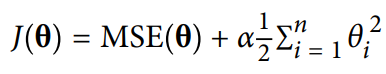

    a regularization term is added to the cost function. The hyperparameter α controls how much you want to regularize the model. If α = 0 then Ridge Regression is just Linear Regression. If α is very large, then all weights end up very close to zero and the result is a flat line going through the data’s mean.
    Note that the bias term θ0 is not regularized (the sum starts at i = 1, not 0).
    For Gradient Descent, adding ℓ2 norm of the weight vector will result as αw added to the MSE gradient vector. 

**Ridge Regression closed-form solution**
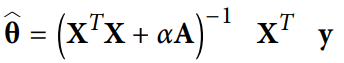

    where A is the (n + 1) × (n + 1) identity matrix13 except with a 0 in the top-left cell, corresponding to bias term.
# Note
    The regularization term should only be added to the cost function during training. 
    Once the model is trained, you want to evaluate the model’s performance using the unregularized performance measure.
    It is quite common for the cost function used during training to be different from the performance measure used for testing. Apart from regularization, another reason why they might be different is that a good training cost function should have optimization friendly derivatives, while the performance measure used for testing should be as close as possible to the final objective.     
    For most regularized models, It is important to scale the data (e.g., using a StandardScaler) before performing regularization, as it is sensitive to the scale of the input features.

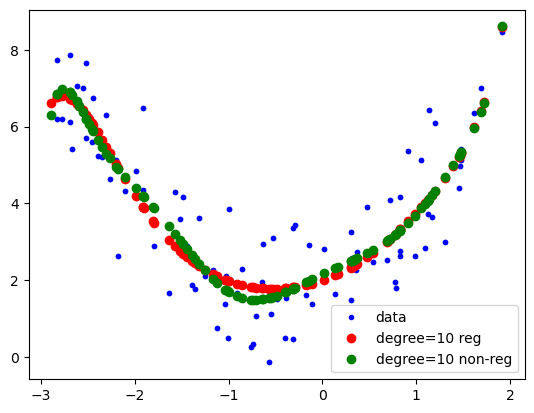

In [10]:
# Ridge Regression closed-form solution 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

X = 5 * np.random.rand(100, 1) - 3
y = X**2 + X + 2 + np.random.randn(100, 1)

plt.plot(X,y,'.')
plt.plot()
reg_without_regularization=Pipeline([
    ('scaler', StandardScaler()),
    ('poly_reg',PolynomialFeatures(degree=10, include_bias=False)),
    ('lin_reg',LinearRegression())
])

reg_with_ridge_regularization=Pipeline([
    ('scaler', StandardScaler()),
    ('poly_reg',PolynomialFeatures(degree=10, include_bias=False)),
    ('ridge_reg',Ridge(alpha=1))
])

reg_without_regularization.fit(X,y)
reg_with_ridge_regularization.fit(X,y)

ypred_without_Reg=reg_without_regularization.predict(X)
ypred_with_Reg=reg_with_ridge_regularization.predict(X)

plt.plot(X,y,'b.', label='data')
plt.plot(X,ypred_with_Reg,'ro', label='degree=10 reg')
plt.plot(X,ypred_without_Reg,'go', label='degree=10 non-reg')
plt.legend()
plt.show() # regularised one is less fluctuating 

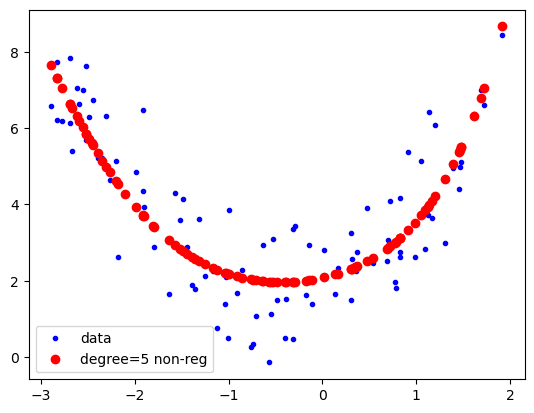

In [11]:
# using Stochastic Gradient Descent
from sklearn.linear_model import SGDRegressor

sgd_with_regularization=Pipeline([
    ('scaler', StandardScaler()),
    ('poly_reg',PolynomialFeatures(degree=5, include_bias=False)),
    ('sgd',SGDRegressor(penalty='l2'))
])

sgd_with_regularization.fit(X,y.ravel()) # ravel because it expexts 1D array - (x,)

ypred_sgd = sgd_with_regularization.predict(X)

plt.plot(X,y,'b.', label='data')
plt.plot(X,ypred_sgd,'ro', label='degree=5 non-reg')
plt.legend()
plt.show() # regularised one is less fluctuating 

# Lasso Regression (Least Absolute Shrinkage and Selection Operator Regression)
    it uses the ℓ1 norm of the weight vector instead of half the square of the ℓ2 norm. 
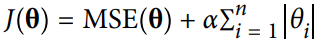

    An important characteristic of Lasso Regression is that it tends to completely eliminate the weights of the least important features (i.e., set them to zero). 
    In other words, Lasso Regression automatically performs feature selection and outputs a sparse model (i.e., with few nonzero feature weights).

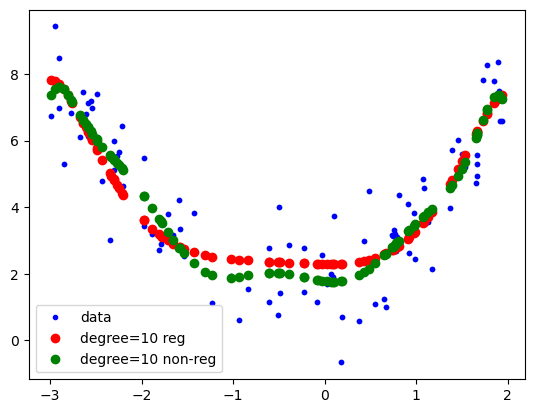

In [12]:
# Ridge Regression closed-form solution 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

X = 5 * np.random.rand(100, 1) - 3
y = X**2 + X + 2 + np.random.randn(100, 1)

plt.plot(X,y,'.')
plt.plot()
reg_without_regularization=Pipeline([
    ('scaler', StandardScaler()),
    ('poly_reg',PolynomialFeatures(degree=10, include_bias=False)),
    ('lin_reg',LinearRegression())
])

reg_with_ridge_regularization=Pipeline([
    ('scaler', StandardScaler()),
    ('poly_reg',PolynomialFeatures(degree=10, include_bias=False)),
    ('lasso_reg',Lasso(alpha=0.1))
])

reg_without_regularization.fit(X,y)
reg_with_ridge_regularization.fit(X,y)

ypred_without_Reg=reg_without_regularization.predict(X)
ypred_with_Reg=reg_with_ridge_regularization.predict(X)

plt.plot(X,y,'b.', label='data')
plt.plot(X,ypred_with_Reg,'ro', label='degree=10 reg')
plt.plot(X,ypred_without_Reg,'go', label='degree=10 non-reg')
plt.legend()
plt.show() # regularised one is less fluctuating 

# Elastic Net
    Elastic Net is combination of Ridge and Lasso Regression. 
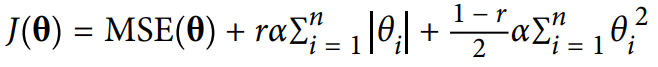

    r = 0, Elastic Net is equivalent to Ridge Regression
    r = 1, Elastic Net is equivalent to Lasso Regression

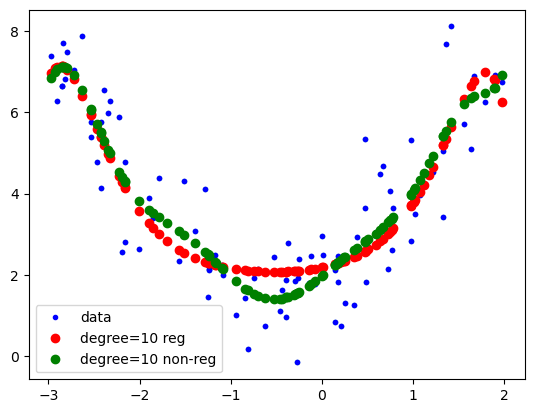

In [13]:
# Elastic Net Regression
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import ElasticNet, LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler


X = 5 * np.random.rand(100, 1) - 3
y = X**2 + X + 2 + np.random.randn(100, 1)

plt.plot(X,y,'.')
plt.plot()
reg_without_regularization=Pipeline([
    ('scaler', StandardScaler()),
    ('poly_reg',PolynomialFeatures(degree=10, include_bias=False)),
    ('lin_reg',LinearRegression())
])

reg_with_ridge_regularization=Pipeline([
    ('scaler', StandardScaler()),
    ('poly_reg',PolynomialFeatures(degree=10, include_bias=False)),
    ('elastic_reg',ElasticNet(alpha=0.1,l1_ratio=0.5))
])

reg_without_regularization.fit(X,y)
reg_with_ridge_regularization.fit(X,y)

ypred_without_Reg=reg_without_regularization.predict(X)
ypred_with_Reg=reg_with_ridge_regularization.predict(X)

plt.plot(X,y,'b.', label='data')
plt.plot(X,ypred_with_Reg,'ro', label='degree=10 reg')
plt.plot(X,ypred_without_Reg,'go', label='degree=10 non-reg')
plt.legend()
plt.show() # regularised one is less fluctuating 

It is almost always preferable to have at least a little bit of regularization, so generally you should avoid plain Linear Regression.

**Ridge Regression: Use when there is a high degree of multicollinearity among input features, or when you want to balance between fitting the data well and limiting the magnitude of the coefficients.**

**Lasso Regression: When only a few features are actually useful, then prefer Lasso since it tend to reduce the useless features’ weights down to zero. or when there is a high number of input features compared to the number of samples.**

**ElasticNet Regression: Use when there is a combination of both multicollinearity among input features and a high number of input features, as ElasticNet balances between L1 and L2 penalties and can provide a good balance between sparse models and balanced shrinkage of coefficients.**

# Early Stopping
    The idea behind early stopping regularization is that as the model continues to train, it will eventually begin to overfit the training data and start to perform worse on new, unseen data. By monitoring the performance on the validation set and stopping the training process when the performance starts to degrade, early stopping regularization can help to prevent overfitting.
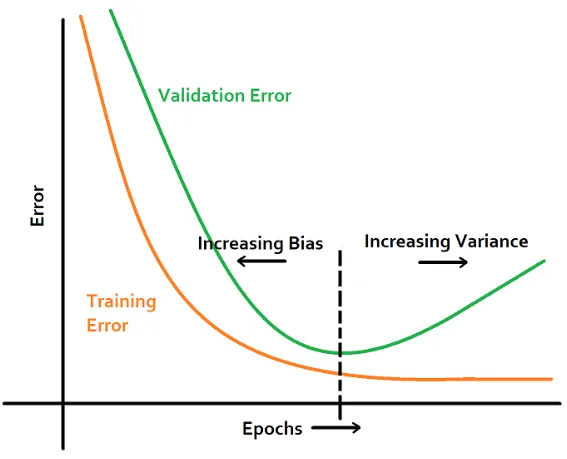

    With Stochastic and Mini-batch Gradient Descent, the curves are not so smooth, and it may be hard to know whether it has reached to the minimum or not. One solution is to stop only after the validation error has been above the minimum for some time (when you are confident that the model will not do any better), then roll back the model parameters to the point where the validation error was at a minimum.

In [14]:
# Early stopping code